cwyang, 19 Mar 2017

from http://cs231n.github.io/neural-networks-case-study/
### Initialization

In [7]:
import numpy as np
import matplotlib.pyplot as plt
xrange=range

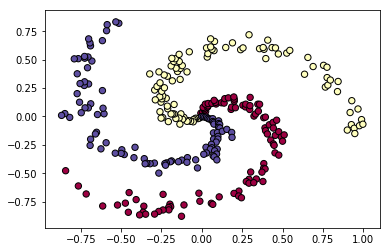

In [20]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
num_examples = X.shape[0]
reg = 0.1
for j in xrange(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral, edgecolor='black')
plt.show()

### Softmax Linear Classifier


<center> $L_i = -\log\left(\frac{e^{f_{y_i}}}{ \sum_j e^{f_j} }\right)\\L =  \underbrace{ \frac{1}{N} \sum_i L_i }_\text{data loss} + \underbrace{ \frac{1}{2} \lambda \sum_k\sum_l W_{k,l}^2 }_\text{regularization loss}$ </center>

In [21]:
# random parameter initialization
W = 0.01 * np.random.randn(D, K)
b = np.zeros((1,K))

# X~(NK,D) W~(D,K). each score for (blue, red, yellow)
scores = np.dot (X, W) + b  

exp_scores = np.exp(scores) #unnormalized
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
correct_loss = -np.log(probs[range(num_examples),y])

# compute the loss: average cross-entropy loss & regularization
data_loss = np.sum(correct_loss) / num_examples
reg_loss = 0.5 * reg * np.sum(W*W) # * is elementwise
loss = data_loss + reg_loss

# initial loss should be 1.1 ~ np.log(1.0 / 3)

### Analytic Gradient with Backpropagation

<center>
$p_k = \frac{e^{f_k}}{ \sum_j e^{f_j} } \hspace{1in} L_i =-\log\left(p_{y_i}\right)\\$
</center>
<center>
$\frac{\partial L_i }{ \partial f_k } = p_k - \mathbb{1}(y_i = k)$
</center>


In [25]:
dscores = probs
dscores[range(num_examples),y] -= 1
dscores /= num_examples

# backprogate into W and b
dW = np.dot(X.T, dscores)
db = np.sum(dscores, axis=0, keepdims=True)
dW += reg*W

# parameter update
# W += -step_size * dW
# b += -step_size * db

### Putting together

In [29]:
#Train a Linear Classifier

# initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in xrange(200):
  
  # evaluate class scores, [N x K]
  scores = np.dot(X, W) + b 
  
  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # compute the loss: average cross-entropy loss and regularization
  corect_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(corect_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W)
  loss = data_loss + reg_loss
  if i % 10 == 0:
    print("iteration %d: loss %f" % (i, loss))
  
  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples
  
  # backpropate the gradient to the parameters (W,b)
  dW = np.dot(X.T, dscores)
  db = np.sum(dscores, axis=0, keepdims=True)
  
  dW += reg*W # regularization gradient
  
  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db

iteration 0: loss 1.099219
iteration 10: loss 0.902872
iteration 20: loss 0.828850
iteration 30: loss 0.794514
iteration 40: loss 0.776195
iteration 50: loss 0.765484
iteration 60: loss 0.758816
iteration 70: loss 0.754472
iteration 80: loss 0.751546
iteration 90: loss 0.749524
iteration 100: loss 0.748098
iteration 110: loss 0.747076
iteration 120: loss 0.746333
iteration 130: loss 0.745787
iteration 140: loss 0.745383
iteration 150: loss 0.745081
iteration 160: loss 0.744854
iteration 170: loss 0.744682
iteration 180: loss 0.744552
iteration 190: loss 0.744453


### accuracy

In [42]:
scores = np.dot(X, W) + b
yy = np.argmax(scores, axis=1)
print('traning accuracy: %.2f' % np.mean(yy == y))
print(W)

traning accuracy: 0.53
[[ 1.14330999  1.253207   -2.41370745]
 [-2.6674787   3.0771851  -0.41982603]]


---
### Two Layer NN